<a href="https://colab.research.google.com/github/bmd94/TimeSeries/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Kaggle/cell/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Kaggle/cell/test.csv')

In [ ]:
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [ ]:
print(train.shape,test.shape)

(913000, 4) (45000, 4)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [ ]:
train.isna().any().sum()

0

In [ ]:
test.isna().any().sum()

0

In [ ]:
train.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [ ]:
train['date']= pd.to_datetime(train['date'])
test['date']= pd.to_datetime(test['date'])

In [ ]:
train.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [ ]:
type(train['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
test.dtypes

id                int64
date     datetime64[ns]
store             int64
item              int64
dtype: object

In [ ]:
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
X = train

In [ ]:
train['day_n']= train['date'].dt.day_name()
train['day_n'].head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: day_n, dtype: object

In [ ]:
train['day_n'].value_counts()

Sunday       130500
Wednesday    130500
Saturday     130500
Friday       130500
Tuesday      130500
Thursday     130500
Monday       130000
Name: day_n, dtype: int64

In [ ]:
train['month_n']= train['date'].dt.month_name()
train['month_n'].head()                      # 2018-08-01 --->  August  

0    January
1    January
2    January
3    January
4    January
Name: month_n, dtype: object

In [ ]:
train['month_n'].value_counts()

May          77500
August       77500
October      77500
January      77500
July         77500
March        77500
December     77500
September    75000
April        75000
June         75000
November     75000
February     70500
Name: month_n, dtype: int64

In [ ]:
train['year_n']= train['date'].dt.year
train['year_n']

0         2013
1         2013
2         2013
3         2013
4         2013
          ... 
912995    2017
912996    2017
912997    2017
912998    2017
912999    2017
Name: year_n, Length: 913000, dtype: int64

In [ ]:
train.columns

Index(['date', 'store', 'item', 'sales', 'day_n', 'month_n', 'year_n'], dtype='object')

In [ ]:
train.nunique()

date       1826
store        10
item         50
sales       213
day_n         7
month_n      12
year_n        5
dtype: int64

In [ ]:
train.describe()

,store,item,sales,year_n
count,913000.000000,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287,2015.000548
std,2.872283,14.430878,28.801144,1.414021
min,1.000000,1.000000,0.000000,2013.000000
25%,3.000000,13.000000,30.000000,2014.000000
50%,5.500000,25.500000,47.000000,2015.000000
75%,8.000000,38.000000,70.000000,2016.000000
max,10.000000,50.000000,231.000000,2017.000000


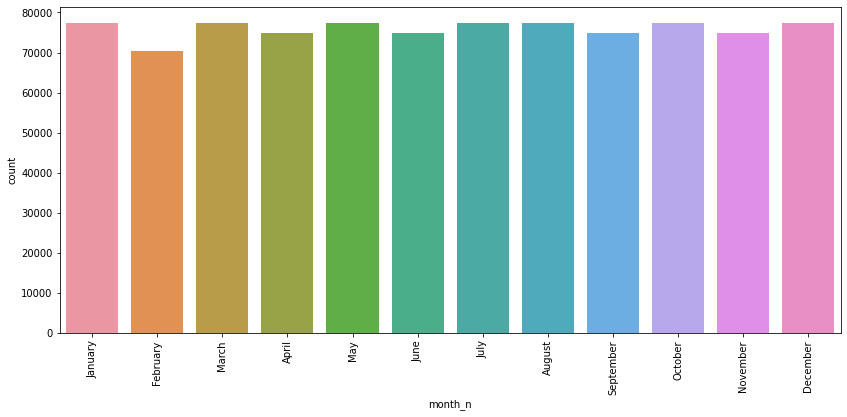

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14,6))
sns.countplot(data=train, x='month_n')
plt.xticks(rotation=90)
plt.show()

In [ ]:
month_sort = train.sort_values('sales',ascending=False).reset_index()

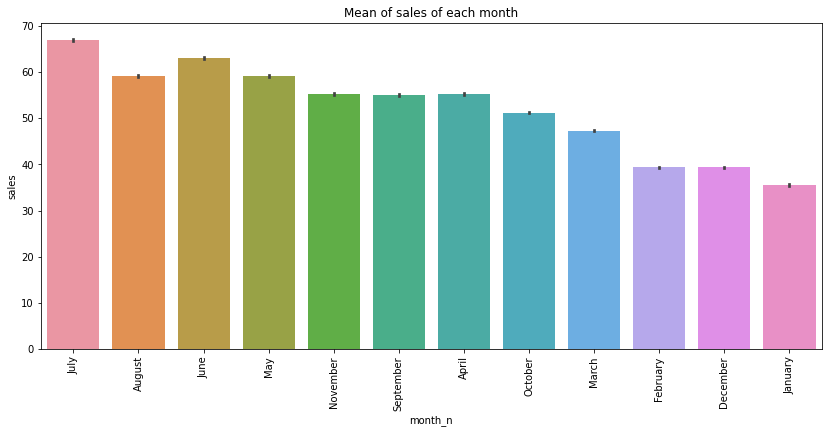

In [ ]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x="month_n", y="sales", data=month_sort)
plt.title(label='Mean of sales of each month')
plt.xticks(rotation=90)
plt.show()

In [ ]:
train.loc[train['month_n']=='September','sales'].mean()

55.07276

In [ ]:
train.loc[train['month_n']=='July','sales'].mean()

66.99861935483871

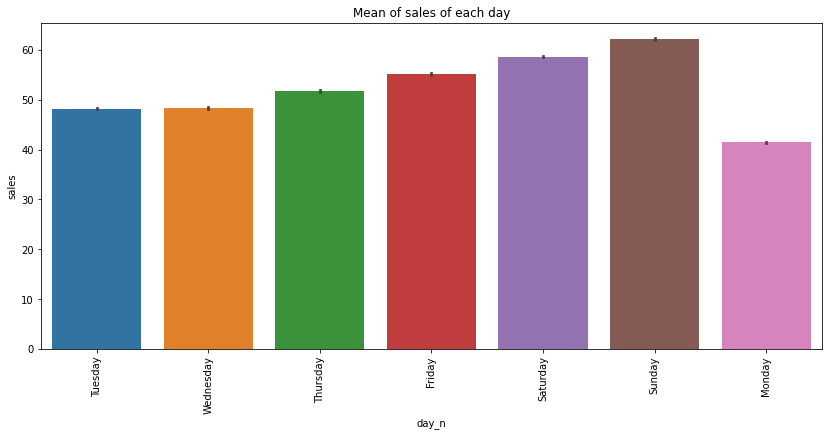

In [ ]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x="day_n", y="sales", data=train)
plt.title(label='Mean of sales of each day')
plt.xticks(rotation=90)
plt.show()

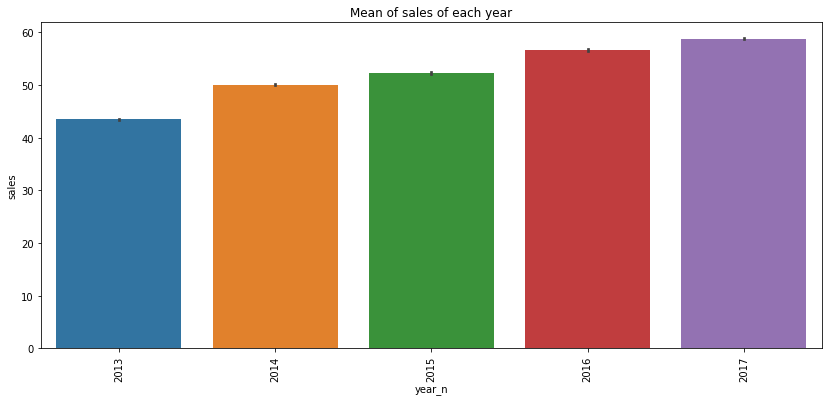

In [ ]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x="year_n", y="sales", data=train)
plt.title(label='Mean of sales of each year')
plt.xticks(rotation=90)
plt.show()

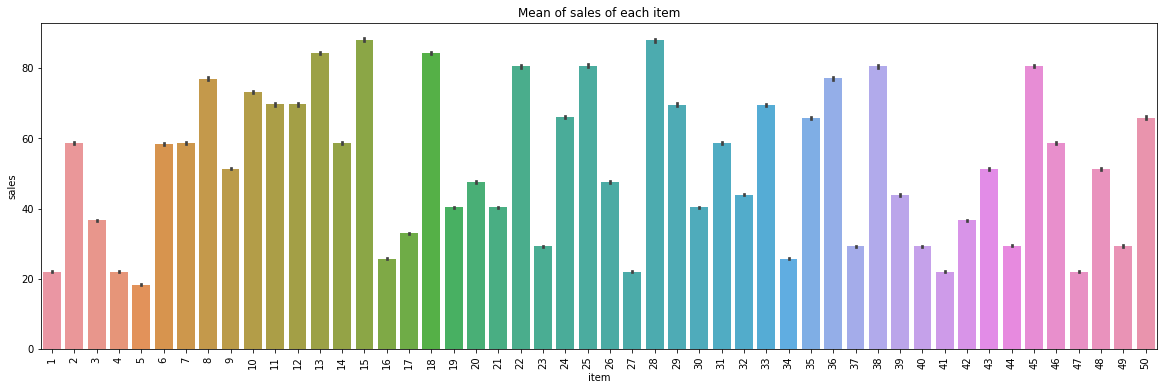

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.barplot(x="item", y="sales", data=train)
plt.title(label='Mean of sales of each item')
plt.xticks(rotation=90)
plt.show()

In [ ]:
!pip install catboost

     |████████████████████████████████| 65.8MB 58kB/s 


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor

In [ ]:
X.dtypes

date       datetime64[ns]
store               int64
item                int64
sales               int64
day_n              object
month_n            object
year_n              int64
dtype: object

In [ ]:
train.head(2)

,date,store,item,sales,day_n,month_n,year_n
0,2013-01-01,1,1,13,Tuesday,January,2013
1,2013-01-02,1,1,11,Wednesday,January,2013


In [ ]:
y = train['sales']
X = train.iloc[:,:3]

In [ ]:
X.head()

,date,store,item
0,2013-01-01,1,1
1,2013-01-02,1,1
2,2013-01-03,1,1
3,2013-01-04,1,1
4,2013-01-05,1,1


In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)
y_test.shape,y_train.shape

((182600,), (730400,))

In [ ]:
sc = StandardScaler()
X_train.iloc[:,1:3] = sc.fit_transform(X_train.iloc[:,1:3])
X_test.iloc[:,1:3] = sc.fit_transform(X_test.iloc[:,1:3])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
X_train

,date,store,item
260085,2015-03-05,-0.870505,-0.728536
167448,2016-07-06,-1.218655,-1.075006
118087,2016-05-08,-0.174205,-1.282887
119783,2015-12-30,0.173945,-1.282887
280352,2015-09-02,-0.522355,-0.659242
...,...,...,...
491263,2013-03-11,1.566545,0.102990
791624,2015-08-25,-0.522355,1.280986
470924,2017-07-01,0.870245,0.033697
491755,2014-07-16,1.566545,0.102990


In [ ]:
import datetime as dt
X_train['date']=X_train['date'].map(dt.datetime.toordinal)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_test['date']=X_test['date'].map(dt.datetime.toordinal)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Regressors = [
              ['LinearRegression :',LinearRegression()],
              #['SVR :',SVR()],
              ['SGDRegressor :',SGDRegressor()],
              ['DecisionTreeRegressor :',DecisionTreeRegressor()],
              ['PLSRegression :',PLSRegression()],
              #['GaussianProcessRegressor :',GaussianProcessRegressor()],
              ['KNeighborsRegressor :',KNeighborsRegressor()],
              ['CatBoostRegressor :',CatBoostRegressor(logging_level='Silent')],
              ['XGBRegressor :',XGBRegressor()],
              ['AdaBoostRegressor :',AdaBoostRegressor()],
              ['GradientBoostingRegressor :',GradientBoostingRegressor()],
              ['ExtraTreesRegressor :',ExtraTreesRegressor()],
              ['HuberRegressor :',HuberRegressor()],
              ['MLPRegressor :',MLPRegressor(hidden_layer_sizes=100, activation='relu',
                                             solver='adam', alpha=0.0001, batch_size='auto')]
]

In [ ]:
predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test
accu=dict()
for name,Regressor in Regressors:
    Regressor = Regressor
    Regressor.fit(X_train, y_train)
    predictions = Regressor.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    accu[name.replace(' :','')]=[mean_absolute_error(y_test, predictions)]
    print(name, mean_squared_error(y_test, predictions))


LinearRegression : 793.1919953164781
SGDRegressor : 4.243679604583254e+39
DecisionTreeRegressor : 179.16619934282585
PLSRegression : 793.1919952924976
KNeighborsRegressor : 618.7523053669222
CatBoostRegressor : 116.65649669680364
[11:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor : 275.02782000470523
AdaBoostRegressor : 819.8167032798943
GradientBoostingRegressor : 275.0197437741357
ExtraTreesRegressor : 139.95410385049286
HuberRegressor : 842.6170742768211


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor : 1522.2070287581028


In [ ]:
# the best value is 0.0
predictions_df.head()

,actual_labels,LinearRegression,SGDRegressor,DecisionTreeRegressor,PLSRegression,KNeighborsRegressor,CatBoostRegressor,XGBRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor,HuberRegressor,MLPRegressor
782526,58,50.891828,6.515098e+19,55.0,50.891828,52.8,55.366596,48.008209,72.996612,48.009607,50.60,43.437246,76.559647
82050,22,63.088845,6.521366e+19,20.0,63.088845,58.6,13.731178,20.979887,39.789301,20.981244,21.49,54.098176,81.011324
718739,17,52.993973,6.516187e+19,27.0,52.993973,26.8,18.875317,32.137699,62.574242,32.138746,19.86,44.950801,77.258376
142779,56,47.862778,6.509369e+19,53.0,47.862778,36.8,54.602957,58.350357,69.529620,58.351919,55.56,52.645778,80.253507
78837,12,48.302513,6.509086e+19,15.0,48.302514,58.6,17.200783,24.279907,46.728552,24.281115,27.43,54.149099,80.935667


In [ ]:
accu

{'AdaBoostRegressor': [24.283133646953477],
 'CatBoostRegressor': [8.185439149268307],
 'DecisionTreeRegressor': [9.853439211391018],
 'ExtraTreesRegressor': [8.894883844468781],
 'GradientBoostingRegressor': [12.547360335975082],
 'HuberRegressor': [22.744415041239776],
 'KNeighborsRegressor': [19.939634173055854],
 'LinearRegression': [22.644846541098076],
 'MLPRegressor': [33.9899318743321],
 'PLSRegression': [22.64484653877567],
 'SGDRegressor': [6.514351409589359e+19],
 'XGBRegressor': [12.547357796563116]}

In [ ]:
from collections import OrderedDict
accu_sorted_by_value = OrderedDict(sorted(accu.items(), key=lambda x: x[1]))
accu_sorted_by_value

OrderedDict([('CatBoostRegressor', [8.185439149268307]),
             ('ExtraTreesRegressor', [8.894883844468781]),
             ('DecisionTreeRegressor', [9.853439211391018]),
             ('XGBRegressor', [12.547357796563116]),
             ('GradientBoostingRegressor', [12.547360335975082]),
             ('KNeighborsRegressor', [19.939634173055854]),
             ('PLSRegression', [22.64484653877567]),
             ('LinearRegression', [22.644846541098076]),
             ('HuberRegressor', [22.744415041239776]),
             ('AdaBoostRegressor', [24.283133646953477]),
             ('MLPRegressor', [33.9899318743321]),
             ('SGDRegressor', [6.514351409589359e+19])])

```
OrderedDict([('CatBoostRegressor', [8.185439149268307]),
             ('ExtraTreesRegressor', [8.894883844468781]),
             ('DecisionTreeRegressor', [9.853439211391018]),
             ('XGBRegressor', [12.547357796563116]),
             ('GradientBoostingRegressor', [12.547360335975082]),
             ('KNeighborsRegressor', [19.939634173055854]),
             ('PLSRegression', [22.64484653877567]),
             ('LinearRegression', [22.644846541098076]),
             ('HuberRegressor', [22.744415041239776]),
             ('AdaBoostRegressor', [24.283133646953477]),
             ('MLPRegressor', [33.9899318743321]),
             ('SGDRegressor', [6.514351409589359e+19])])

```




In [ ]:
from sklearn.model_selection import GridSearchCV

model = CatBoostRegressor()
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)

print("\n ========================================================")

0:	learn: 27.7480866	total: 194ms	remaining: 19.2s
1:	learn: 26.8392173	total: 324ms	remaining: 15.9s
2:	learn: 26.0741462	total: 457ms	remaining: 14.8s
3:	learn: 25.4185873	total: 586ms	remaining: 14.1s
4:	learn: 24.8271865	total: 717ms	remaining: 13.6s
5:	learn: 24.3606582	total: 846ms	remaining: 13.2s
6:	learn: 23.9391635	total: 986ms	remaining: 13.1s
7:	learn: 23.5072310	total: 1.11s	remaining: 12.8s
8:	learn: 23.1913398	total: 1.25s	remaining: 12.6s
9:	learn: 22.8271891	total: 1.38s	remaining: 12.4s
10:	learn: 22.5442455	total: 1.51s	remaining: 12.2s
11:	learn: 22.2258953	total: 1.64s	remaining: 12s
12:	learn: 21.9250814	total: 1.77s	remaining: 11.8s
13:	learn: 21.6471729	total: 1.91s	remaining: 11.7s
14:	learn: 21.4372313	total: 2.04s	remaining: 11.6s
15:	learn: 21.2282273	total: 2.18s	remaining: 11.4s
16:	learn: 20.9860239	total: 2.32s	remaining: 11.3s
17:	learn: 20.7894767	total: 2.45s	remaining: 11.2s
18:	learn: 20.4347028	total: 2.59s	remaining: 11s
19:	learn: 20.2747815	tota

In [ ]:
Xt = test.iloc[:,1:]
Xt['date']=Xt['date'].map(dt.datetime.toordinal)
Xt = sc.fit_transform(Xt)
Xt

array([[-1.71291154, -1.5666989 , -1.69774938],
       [-1.67441914, -1.5666989 , -1.69774938],
       [-1.63592675, -1.5666989 , -1.69774938],
       ...,
       [ 1.63592675,  1.5666989 ,  1.69774938],
       [ 1.67441914,  1.5666989 ,  1.69774938],
       [ 1.71291154,  1.5666989 ,  1.69774938]])

In [ ]:
model = CatBoostRegressor(depth=10, iterations=100, learning_rate= 0.1)
model.fit(X_train, y_train) 
predict = model.predict(X_test)


0:	learn: 27.7480866	total: 146ms	remaining: 14.5s
1:	learn: 26.8392173	total: 277ms	remaining: 13.6s
2:	learn: 26.0741462	total: 410ms	remaining: 13.2s
3:	learn: 25.4185873	total: 539ms	remaining: 12.9s
4:	learn: 24.8271865	total: 673ms	remaining: 12.8s
5:	learn: 24.3606582	total: 803ms	remaining: 12.6s
6:	learn: 23.9391635	total: 949ms	remaining: 12.6s
7:	learn: 23.5072310	total: 1.09s	remaining: 12.5s
8:	learn: 23.1913398	total: 1.23s	remaining: 12.4s
9:	learn: 22.8271891	total: 1.36s	remaining: 12.3s
10:	learn: 22.5442455	total: 1.5s	remaining: 12.1s
11:	learn: 22.2258953	total: 1.63s	remaining: 11.9s
12:	learn: 21.9250814	total: 1.76s	remaining: 11.8s
13:	learn: 21.6471729	total: 1.89s	remaining: 11.6s
14:	learn: 21.4372313	total: 2.03s	remaining: 11.5s
15:	learn: 21.2282273	total: 2.17s	remaining: 11.4s
16:	learn: 20.9860239	total: 2.3s	remaining: 11.2s
17:	learn: 20.7894767	total: 2.43s	remaining: 11.1s
18:	learn: 20.4347028	total: 2.57s	remaining: 10.9s
19:	learn: 20.2747815	to

In [ ]:
print(mean_absolute_error(y_test, predict)) #   8.185439149268307   9.554859610978825
print(mean_squared_error(y_test, predict))  #   116.65649669680364  163.13236748874866

9.554859610978825
163.13236748874866


In [ ]:
test_pre = model.predict(Xt)

In [ ]:
test_pre

array([ 8.37538028,  8.37538028,  8.37538028, ..., 46.24445273,
       46.24445273, 46.24445273])

In [ ]:
test['sales_p'] = test_pre

In [ ]:
test['sales_p'].round(decimals=0)
test.tail(10)

,id,date,store,item,sales_p
44990,44990,2018-03-22,10,50,46.244453
44991,44991,2018-03-23,10,50,46.244453
44992,44992,2018-03-24,10,50,46.244453
44993,44993,2018-03-25,10,50,46.244453
44994,44994,2018-03-26,10,50,46.244453
44995,44995,2018-03-27,10,50,46.244453
44996,44996,2018-03-28,10,50,46.244453
44997,44997,2018-03-29,10,50,46.244453
44998,44998,2018-03-30,10,50,46.244453
44999,44999,2018-03-31,10,50,46.244453
